In [0]:
import os
os.chdir("data/datasets/paultimothymooney/chest-xray-pneumonia")

In [0]:
os.chdir("chest_xray")

In [0]:
paths = []
labels = [] 
for i in os.listdir("train/PNEUMONIA"):
  labels.append(i.split("_")[1])
  paths.append(f"train/PNEUMONIA/{i}")
for i in os.listdir("train/NORMAL"):
  labels.append("normal")
  paths.append(f"train/NORMAL/{i}")

In [0]:
test_paths = []
test_labels = [] 
for i in os.listdir("test/PNEUMONIA"):
  test_labels.append(i.split("_")[1])
  test_paths.append(f"test/PNEUMONIA/{i}")
for i in os.listdir("test/NORMAL"):
  test_labels.append("normal")
  test_paths.append(f"test/NORMAL/{i}")

In [0]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"paths":paths, "labels":labels})
df.head()

,paths,labels
0,train/PNEUMONIA/person484_virus_986.jpeg,virus
1,train/PNEUMONIA/person1133_bacteria_3075.jpeg,bacteria
2,train/PNEUMONIA/person370_bacteria_1688.jpeg,bacteria
3,train/PNEUMONIA/person1503_virus_2613.jpeg,virus
4,train/PNEUMONIA/person1034_bacteria_2968.jpeg,bacteria


Text(0.5, 1.0, 'Data distribution')

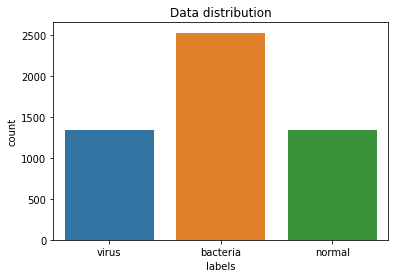

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "labels", data = df)
plt.title("Data distribution")

In [0]:
bacteria = 0
normal = 0
virus = 0
for i in labels:
  if i == "bacteria": bacteria+=1
  if i == "virus": virus+=1
  if i == "normal": normal+=1
print(f"bacteria : {bacteria}, normal : {normal}, virus : {virus}")

bacteria : 2530, normal : 1341, virus : 1345


In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2
def read_image(file_path):
    img = img_to_array(load_img(file_path,target_size = (224,224)))
    if img.shape[-1] == 1:
      img = np.dstack([img,img,img])
    img = img.astype(np.float32)/255.

    return img
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 224, 224,3), dtype=np.float32)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data
train = prep_data(paths)
test = prep_data(test_paths)

In [0]:
from numpy import save
save("/content/drive/My Drive/Pneumonia/train.npy",train)
save("/content/drive/My Drive/Pneumonia/test.npy", test)
save("/content/drive/My Drive/Pneumonia/train_labels.npy", np.asarray(labels))
save("/content/drive/My Drive/Pneumonia/test_labels.npy", np.asarray(test_labels))